In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# import chardet

# path = 'Хакатон/'

### Первичная предобработка данных

In [8]:
# encoding definition
# больше не нужно
with open('Хакатон/Х_Студенты.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

print(encoding)

windows-1251


In [5]:
# больше не нужно
import os

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        tmp = pd.read_csv(path+filename, encoding='windows-1251', sep=';').to_csv(path+filename, encoding='utf-8', index=False)

/tmp/ipykernel_1231005/1361548196.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp = pd.read_csv(path+filename, encoding='windows-1251', sep=';').to_csv(path+filename, encoding='utf-8', index=False)


In [20]:
chunk_size = int(grade_df.shape[0] / 3)

# def split_df(path, chunk_size):
#     df = pd.read_csv(path, chunksize=chunk_size)
#     num_chunks = len(df) // chunk_size + 1
#     chunks = [df[i * chunk_size: (i + 1) * chunk_size] for i in range(num_chunks)]
#     return chunks
# chunk_size

for i, chunk in enumerate(pd.read_csv('Х_Успеваемость.csv', chunksize=chunk_size)):
    chunk.to_csv('Х_Успеваемость{}.csv'.format(i), index=False)

/tmp/ipykernel_59008/2716343271.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path + 'Х_Успеваемость.csv', chunksize=chunk_size)):
/tmp/ipykernel_59008/2716343271.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(path + 'Х_Успеваемость.csv', chunksize=chunk_size)):


### Работа с данными

In [110]:
tasks_df = pd.read_csv('Х_Здания.csv')
hardware_df = pd.read_csv('Х_Оборудование_ИТ.csv')
harware_scientific_df = pd.read_csv('Х_Оборудование_научное.csv')
rating_df = pd.read_csv('Х_Рейтинг НПР.csv')
estimates_df = pd.read_csv('Х_Сметы.csv')
employee_df = pd.read_csv('Х_Сотрудники.csv')
students_df = pd.read_csv('Х_Студенты.csv')
grade_df = pd.read_csv('Х_Успеваемость.csv')

/tmp/ipykernel_6751/3547637807.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  grade_df = pd.read_csv('Х_Успеваемость.csv')


### Пытаюсь уменьшить размер датасета

float64 -> float16
int64 -> int16
object -> datetime64
object -> category

In [107]:
print(grade_df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Студент             1048575 non-null  object 
 1   Семестр             1048575 non-null  int64  
 2   Предмет             1048575 non-null  object 
 3   Тип дисциплины      1047607 non-null  object 
 4   Часы                745572 non-null   float64
 5   Дата сдачи          1038205 non-null  object 
 6   Балл за семестр     726203 non-null   float64
 7   Балл сдачи          725966 non-null   float64
 8   Балл итоговый       726114 non-null   float64
 9   Отметка             1047646 non-null  object 
 10  Дисциплина/ЖТК      1048575 non-null  object 
 11  Подразделение       1048575 non-null  object 
 12  Институт            1048575 non-null  object 
 13  Очное/заочное       1048575 non-null  object 
 14  Специальность       1048575 non-null  object 
 15  Специальность ш

In [111]:
numerics = ['float64', 'int64', 'object']
for column in grade_df.columns:
    column_type = grade_df[column].dtype
    if column_type == 'float64':
        grade_df[column] = grade_df[column].astype(np.float16)
    if column_type == 'int64':
        grade_df[column] = grade_df[column].astype(np.int8)
    if column_type == 'object':
        grade_df[column] = grade_df[column].astype('category')

In [112]:
print(grade_df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Студент             1048575 non-null  category
 1   Семестр             1048575 non-null  int8    
 2   Предмет             1048575 non-null  category
 3   Тип дисциплины      1047607 non-null  category
 4   Часы                745572 non-null   float16 
 5   Дата сдачи          1038205 non-null  category
 6   Балл за семестр     726203 non-null   float16 
 7   Балл сдачи          725966 non-null   float16 
 8   Балл итоговый       726114 non-null   float16 
 9   Отметка             1047646 non-null  category
 10  Дисциплина/ЖТК      1048575 non-null  category
 11  Подразделение       1048575 non-null  category
 12  Институт            1048575 non-null  category
 13  Очное/заочное       1048575 non-null  category
 14  Специальность       1048575 non-null  category
 15

In [117]:
grade_df.to_csv('Успеваемость.gz', index=False, compression='gzip')

### Студенты и их успеваемость

Данные можно объединить по имени, типу квалификации, специалности, гражданству

In [3]:
students_df['Институт'].value_counts()

Институт
Юридический факультет                                             1566
Институт вычислительной математики и информационных технологий     737
Отделение педагогики                                               537
Институт фундаментальной медицины и биологии                       532
Подготовительный факультет для иностранных учащихся                530
                                                                  ... 
Автомеханический колледж                                             7
Общеэкономическое отделение                                          7
Гуманитарное отделение                                               6
Филологический факультет                                             4
Колледж автоматизации и прогрессивных технологий                     1
Name: count, Length: 92, dtype: int64

In [4]:
n = students_df['Институт'].isna().sum()
al = students_df.shape[0]
print(f'Пустые институты {n / al * 100} %')

Пустые институты 9.75158414175966 %


In [5]:
un_name = students_df['Имя'].unique().shape[0]
un_name_gade = grade_df['Студент'].unique().shape[0]
print(f'Количество уникальных имен студентов вообще {un_name}, количество уникальных имен студентов в успеваемости {un_name_gade}')

Количество уникальных имен студентов вообще 2852, количество уникальных имен студентов в успеваемости 1686


In [6]:
print(f'Количество студентов вообще {students_df.shape[0]}, количество студентов в успеваемости {grade_df.shape[0]}')

Количество студентов вообще 17833, количество студентов в успеваемости 1048575


In [27]:
students_df.columns, grade_df.columns

(Index(['Имя', 'Пол', 'Дата рождения', 'Место рождения', 'Место жительства',
        'Год поступления', 'Группа', 'Специальность', 'Специализация',
        'Институт', 'Тип обучения', 'Квалификация', 'Категория', 'Публикации',
        'Конференции', 'Медаль', 'Олимпиады', 'Статус', 'Начало приказа',
        'Окончание приказа', 'Место окончания учебы', 'Тип школы',
        'Год окончания школы', 'Страна', 'Регион', 'Район', 'Город', 'Локация',
        'Гражданство', 'Страна гражданства', 'Причина ухода', 'Курс'],
       dtype='object'),
 Index(['Студент', 'Семестр', 'Предмет', 'Тип дисциплины', 'Часы', 'Дата сдачи',
        'Балл за семестр', 'Балл сдачи', 'Балл итоговый', 'Отметка',
        'Дисциплина/ЖТК', 'Подразделение', 'Институт', 'Очное/заочное',
        'Специальность', 'Специальность шифр', 'Группа', 'Курс', 'Категория',
        'Страна', 'Гражданство', 'КФУ/НЧФ/ЕФ', 'Отделение', 'Тип квалификации',
        'Кол-во должников'],
       dtype='object'))

In [49]:
test1 = pd.concat([students_df, grade_df], axis=1, join='inner')
test2 = pd.merge(students_df, grade_df, left_on=['Имя', 'Группа', 'Гражданство'], right_on=['Студент', 'Группа', 'Гражданство'], how='inner')

In [38]:
students_df.shape, grade_df.shape

((17833, 32), (1048575, 25))

In [42]:
test1.shape, test2.shape

((17833, 57), (9360, 56))

In [50]:
test1['Имя'].unique().shape, test2['Имя'].unique().shape

((2852,), (206,))

In [99]:
students_df['Гражданство'].value_counts()

Гражданство
Гражданин Российской Федерации                                                     14720
Иностранный гражданин - ближнее зарубежье                                           1646
Иностранный гражданин - дальнее зарубежье                                           1247
Гражданин Российской Федерации и иностранного государства (двойное гражданство)        4
Name: count, dtype: int64

In [96]:
students_df['Гражданство'].value_counts()

Гражданство
Гражданин Российской Федерации                                                     14720
Иностранный гражданин - ближнее зарубежье                                           1646
Иностранный гражданин - дальнее зарубежье                                           1247
Гражданин Российской Федерации и иностранного государства (двойное гражданство)        4
Name: count, dtype: int64

In [93]:
grade_df['Гражданство'].value_counts()

Гражданство
Гражданин Российской Федерации    1048488
Ближнее зарубежье                      62
Двойное гражданство                    25
Name: count, dtype: int64

In [57]:
students_df['Город'].unique().shape, students_df['Место окончания учебы'].unique().shape

((995,), (2661,))

In [83]:
print(f"Квалфикации, у которых нет инфы об успеваемости: {students_df[students_df['Квалификация'] != np.unique(grade_df['Тип квалификации'].values)[0]]['Квалификация'].unique()}")

Квалфикации, у которых нет инфы об успеваемости: ['магистр' 'специалист' nan 'предвузовская подготовка' 'ординатор']


In [60]:
grade_df['Страна'].shape, grade_df['Гражданство'].shape

((1048575,), (1048575,))

In [52]:
grade_df['Гражданство'].value_counts()

Гражданство
Гражданин Российской Федерации    1048488
Ближнее зарубежье                      62
Двойное гражданство                    25
Name: count, dtype: int64

In [103]:
grade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Студент             1048575 non-null  object 
 1   Семестр             1048575 non-null  int64  
 2   Предмет             1048575 non-null  object 
 3   Тип дисциплины      1047607 non-null  object 
 4   Часы                745572 non-null   float64
 5   Дата сдачи          1038205 non-null  object 
 6   Балл за семестр     726203 non-null   float64
 7   Балл сдачи          725966 non-null   float64
 8   Балл итоговый       726114 non-null   float64
 9   Отметка             1047646 non-null  object 
 10  Дисциплина/ЖТК      1048575 non-null  object 
 11  Подразделение       1048575 non-null  object 
 12  Институт            1048575 non-null  object 
 13  Очное/заочное       1048575 non-null  object 
 14  Специальность       1048575 non-null  object 
 15  Специальность ш

In [54]:
grade_df['Страна'].value_counts()

Страна
Российская Федерация    1048575
Name: count, dtype: int64

In [51]:
test2

,Имя,Пол,Дата рождения,Место рождения,Место жительства,Год поступления,Группа,Специальность_x,Специализация,Институт_x,...,Очное/заочное,Специальность_y,Специальность шифр,Курс_y,Категория_y,Страна_y,КФУ/НЧФ/ЕФ,Отделение,Тип квалификации,Кол-во должников
0,Эльвира,ж,май.02,РОССИЙСКАЯ ФЕДЕРАЦИЯ,NaN,2020,04.3-307,Зарубежное регионоведение,Германо-российские исследования,NaN,...,очное,Лингвистика,45.03.02,1,контракт,Российская Федерация,КФУ,Институт международных отношений,бакалавр,отлично
1,Анастасия,ж,окт.85,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Респ. Татарстан",2015,13.1-302б,Государственное и муниципальное управление,NaN,Экономическое отделение,...,очное,Теология,48.03.01,1,бюджет,Российская Федерация,КФУ,Институт социально-философских наук и массовых...,бакалавр,отлично
2,Анастасия,ж,окт.85,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Респ. Татарстан",2015,13.1-302б,Государственное и муниципальное управление,NaN,Экономическое отделение,...,очное,Теология,48.03.01,1,бюджет,Российская Федерация,КФУ,Институт социально-философских наук и массовых...,бакалавр,зачтено
3,Анастасия,ж,окт.85,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Респ. Татарстан",2015,13.1-302б,Государственное и муниципальное управление,NaN,Экономическое отделение,...,очное,Теология,48.03.01,1,бюджет,Российская Федерация,КФУ,Институт социально-философских наук и массовых...,бакалавр,хорошо
4,Анастасия,ж,окт.85,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Респ. Татарстан",2015,13.1-302б,Государственное и муниципальное управление,NaN,Экономическое отделение,...,очное,Теология,48.03.01,1,бюджет,Российская Федерация,КФУ,Институт социально-философских наук и массовых...,бакалавр,хорошо
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7755,Иван,м,ноя.88,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Татарстан респ.,, Нижн...",2020,06-011,Электроэнергетика и электротехника,Электроснабжение,NaN,...,очное,Физика,03.03.2002,4,бюджет,Российская Федерация,КФУ,Институт физики,бакалавр,не сдает
7756,Иван,м,ноя.88,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Татарстан респ.,, Нижн...",2020,06-011,Электроэнергетика и электротехника,Электроснабжение,NaN,...,очное,Физика,03.03.2002,4,бюджет,Российская Федерация,КФУ,Институт физики,бакалавр,удовлетворительно
7757,Иван,м,ноя.88,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Татарстан респ.,, Нижн...",2020,06-011,Электроэнергетика и электротехника,Электроснабжение,NaN,...,очное,Физика,03.03.2002,4,бюджет,Российская Федерация,КФУ,Институт физики,бакалавр,отлично
7758,Иван,м,ноя.88,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Татарстан респ.,, Нижн...",2020,06-011,Электроэнергетика и электротехника,Электроснабжение,NaN,...,очное,Физика,03.03.2002,4,бюджет,Российская Федерация,КФУ,Институт физики,бакалавр,зачтено


In [46]:
students_df[students_df['Имя'] == "Дарья"]

,Имя,Пол,Дата рождения,Место рождения,Место жительства,Год поступления,Группа,Специальность,Специализация,Институт,...,Год окончания школы,Страна,Регион,Район,Город,Локация,Гражданство,Страна гражданства,Причина ухода,Курс
1,Дарья,ж,апр.96,РЕСПУБЛИКА УЗБЕКИСТАН,РЕСПУБЛИКА УЗБЕКИСТАН,2020,1351з,Экономика,не предусмотрено,Центр заочного и дистанционного обучения,...,2025.0,Республика Узбекистан,обл. Самаркандский,,г. Самарканд,-,Иностранный гражданин - ближнее зарубежье,Республика Узбекистан,в связи с расторжением договора на обучение по...,2.0
96,Дарья,ж,июл.80,РОССИЙСКАЯ ФЕДЕРАЦИЯ,NaN,1997,2306,Геофизические методы поисков и разведки местор...,Геофизические методы поиска и разведки твердых...,Институт геологии и нефтегазовых технологий,...,NaN,Российская Федерация,,,,,Гражданин Российской Федерации,Российская Федерация,NaN,6.0
172,Дарья,ж,авг.00,РОССИЙСКАЯ ФЕДЕРАЦИЯ,NaN,2018,01-540-5,Прикладная информатика,Прикладная информатика в экономике,Экономическое отделение,...,2022.0,Российская Федерация,Респ. Башкортостан,р-н Дюртюлинский,г. Дюртюли,,Гражданин Российской Федерации,Российская Федерация,в связи с окончанием Университета,4.0
339,Дарья,ж,фев.97,ТУРКМЕНИСТАН,NaN,2016,01-502,Перевод и переводоведение,Лингвистическое обеспечение межгосударственных...,Отделение юридических и социальных наук,...,2021.0,Туркменистан,,,,с. Дашрабат,Иностранный гражданин - ближнее зарубежье,Туркменистан,в связи с расторжением договора на обучение по...,5.0
382,Дарья,ж,мар.93,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Респ. Татарстан, г. Набе...",2015,04.3-301,Юриспруденция,Гражданское право,Юридический факультет,...,2019.0,Российская Федерация,Респ. Татарстан,,г. Набережные Челны,,Гражданин Российской Федерации,Российская Федерация,в связи с окончанием Университета,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17335,Дарья,ж,дек.05,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, 420000, Респ. Татарстан,...",2023,619,Лечебное дело,Лечебное дело,NaN,...,2028.0,Российская Федерация,Респ. Татарстан,,г. Казань,,Гражданин Российской Федерации,Российская Федерация,NaN,1.0
17369,Дарья,ж,май.02,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, 426075, Удмуртская, Иж...",2023,10.3-006,Дизайн,Моушн-дизайн,NaN,...,2028.0,Российская Федерация,Удмуртская,,Ижевск,,Гражданин Российской Федерации,Российская Федерация,NaN,1.0
17624,Дарья,ж,дек.00,РЕСПУБЛИКА УЗБЕКИСТАН,"РЕСПУБЛИКА УЗБЕКИСТАН, г. Ангрен, ул. Мустакил...",2023,08-317,Филология,Русский язык и литература в пространстве миров...,NaN,...,2025.0,Республика Узбекистан,,,г. Ангрен,,Иностранный гражданин - ближнее зарубежье,Республика Узбекистан,NaN,1.0
17782,Дарья,ж,янв.05,ЕГИПЕТ,"ЕГИПЕТ, Омар Лотфи Спортинг Сиди Габер, д. 146",2023,10.1-919,General Medicine,NaN,NaN,...,2028.0,Египет,,,Омар Лотфи Спортинг Сиди Габер,,Иностранный гражданин - дальнее зарубежье,Египет,NaN,1.0


In [45]:
test1

,Имя,Пол,Дата рождения,Место рождения,Место жительства,Год поступления,Группа,Специальность,Специализация,Институт,...,Специальность шифр,Группа,Курс,Категория,Страна,Гражданство,КФУ/НЧФ/ЕФ,Отделение,Тип квалификации,Кол-во должников
0,Анастасия,ж,сен.95,КИТАЙСКАЯ НАРОДНАЯ РЕСПУБЛИКА,"КИТАЙСКАЯ НАРОДНАЯ РЕСПУБЛИКА, Китай",2020,01-Ак.от.4,Филология,Русский язык как иностранный,Высшая школа русского языка и межкультурной ко...,...,45.03.02,04.3-018,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
1,Дарья,ж,апр.96,РЕСПУБЛИКА УЗБЕКИСТАН,РЕСПУБЛИКА УЗБЕКИСТАН,2020,1351з,Экономика,не предусмотрено,Центр заочного и дистанционного обучения,...,45.03.02,04.3-017,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
2,Шерзод,м,апр.02,РОССИЙСКАЯ ФЕДЕРАЦИЯ,РОССИЙСКАЯ ФЕДЕРАЦИЯ,2020,1231110,Фундаментальная информатика и информационные т...,NaN,Институт вычислительной математики и информаци...,...,45.03.02,04.3-018,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
3,Милана,ж,апр.02,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, 420095, Респ. Татарстан,...",2020,20-2306Д,Реклама и связи с общественностью,Реклама и связи с общественностью в различных ...,Высшая школа журналистики и медиакоммуникаций,...,45.03.02,04.3-002а,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
4,Эльвира,ж,май.02,РОССИЙСКАЯ ФЕДЕРАЦИЯ,NaN,2020,04.3-307,Зарубежное регионоведение,Германо-российские исследования,NaN,...,45.03.02,04.3-008,4,контракт,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт международных отношений,бакалавр,зачтено
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17828,Екатерина,ж,янв.01,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Респ. Татарстан, г. Каза...",2020,14.4-090,Педагогическое образование (с двумя профилями ...,Иностранный (английский) язык и второй иностра...,NaN,...,01.03.2004,09-122,3,бюджет,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт вычислительной математики и информаци...,бакалавр,зачтено
17829,Ляйсан,ж,апр.03,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"Республика Татарстан, Казань, Толбухина, д....",2024,09-302,Астрономия,Астрофизика и космология,Институт физики,...,01.03.2002,09-113,3,бюджет,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт вычислительной математики и информаци...,бакалавр,зачтено
17830,Павел,м,апр.99,РОССИЙСКАЯ ФЕДЕРАЦИЯ,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, Респ. Татарстан, г. Набе...",2019,20-2211Б,Автоматизация технологических процессов и прои...,NaN,NaN,...,09.03.2003,09-153,3,бюджет,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт вычислительной математики и информаци...,бакалавр,зачтено
17831,Гурбанмырат,м,авг.99,ТУРКМЕНИСТАН,"РОССИЙСКАЯ ФЕДЕРАЦИЯ, г. Казань, ул. Проспект ...",2024,э410,Экономика,"Бухгалтерский учет, анализ и аудит",Центр заочного и дистанционного обучения,...,01.03.2002,09-113,3,бюджет,Российская Федерация,Гражданин Российской Федерации,КФУ,Институт вычислительной математики и информаци...,бакалавр,зачтено


In [5]:
grade_df['Кол-во должников'].value_counts(), grade_df['Тип квалификации'].value_counts()

(Кол-во должников
 зачтено                462587
 отлично                287033
 хорошо                 153240
 удовлетворительно      101613
 отсут. по неув.         13694
 не зачтено              12420
 неудовлетворительно     11496
 не сдает                 3035
 освоб.                   2093
 0                         374
 отсут. по ув.              61
 Name: count, dtype: int64,
 Тип квалификации
 бакалавр    1048575
 Name: count, dtype: int64)

In [24]:
tasks_df

,Unnamed: 0,Наименование (литера) (альтернативное название),Земельный участок,Адрес,Назначение,Характеристики
0,1.0,Автоматический шлагбаум,16:50:010216:3,"Республика Татарстан, г. Казань, Вахитовский р...",прочего назначения,NaN
1,2.0,Административное здание (А) (Административное ...,16:50:070403:82,"Республика Татарстан, г. Казань, Приволжский р...",административное,"общая площадь: 2142,80"
2,NaN,NaN,NaN,NaN,NaN,"закрепленная площадь: 2532,60 кв.м"
3,NaN,NaN,NaN,NaN,NaN,год постройки: 1979
4,NaN,NaN,NaN,NaN,NaN,количество этажей: 4
...,...,...,...,...,...,...
621,243.0,"Экологический факультет университета (А, А1, А...",16:50:010404:4,"Республика Татарстан, г. Казань, Вахитовский р...",учебно-лабораторное,"общая площадь: 188,80 кв.м"
622,NaN,NaN,NaN,NaN,NaN,"закрепленная площадь: 350,60 кв.м"
623,NaN,NaN,NaN,NaN,NaN,год постройки: 1821
624,NaN,NaN,NaN,NaN,NaN,количество этажей: 2


In [26]:
employee_df['Дата окончания исполнения'].value_counts()

Дата окончания исполнения
01.01.2120    2411
30.06.2024    2269
30.04.2024     748
31.08.2026     735
31.08.2024     704
              ... 
12.12.2024       1
02.06.2026       1
30.12.2027       1
08.09.2025       1
04.03.2027       1
Name: count, Length: 229, dtype: int64

In [13]:
students_df.info(), students_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17833 entries, 0 to 17832
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Имя                    17833 non-null  object 
 1   Пол                    17833 non-null  object 
 2   Дата рождения          17833 non-null  object 
 3   Место рождения         17150 non-null  object 
 4   Место жительства       11712 non-null  object 
 5   Год поступления        17833 non-null  int64  
 6   Группа                 17655 non-null  object 
 7   Специальность          17833 non-null  object 
 8   Специализация          15514 non-null  object 
 9   Институт               16094 non-null  object 
 10  Тип обучения           17833 non-null  object 
 11  Квалификация           17484 non-null  object 
 12  Категория              17833 non-null  object 
 13  Публикации             17833 non-null  int64  
 14  Конференции            17833 non-null  int64  
 15  Ме

(None, (17833, 32))

In [21]:
grade_df.columns

Index(['Студент', 'Семестр', 'Предмет', 'Тип дисциплины', 'Часы', 'Дата сдачи',
       'Балл за семестр', 'Балл сдачи', 'Балл итоговый', 'Отметка',
       'Дисциплина/ЖТК', 'Подразделение', 'Институт', 'Очное/заочное',
       'Специальность', 'Специальность шифр', 'Группа', 'Курс', 'Категория',
       'Страна', 'Гражданство', 'КФУ/НЧФ/ЕФ', 'Отделение', 'Тип квалификации',
       'Кол-во должников'],
      dtype='object')

In [6]:
grade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Студент             1048575 non-null  object 
 1   Семестр             1048575 non-null  int64  
 2   Предмет             1048575 non-null  object 
 3   Тип дисциплины      1047607 non-null  object 
 4   Часы                745572 non-null   float64
 5   Дата сдачи          1038205 non-null  object 
 6   Балл за семестр     726203 non-null   float64
 7   Балл сдачи          725966 non-null   float64
 8   Балл итоговый       726114 non-null   float64
 9   Отметка             1047646 non-null  object 
 10  Дисциплина/ЖТК      1048575 non-null  object 
 11  Подразделение       1048575 non-null  object 
 12  Институт            1048575 non-null  object 
 13  Очное/заочное       1048575 non-null  object 
 14  Специальность       1048575 non-null  object 
 15  Специальность ш

In [ ]:
plt.plot()

In [65]:
students_df.columns, students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17833 entries, 0 to 17832
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Имя                    17833 non-null  object 
 1   Пол                    17833 non-null  object 
 2   Дата рождения          17833 non-null  object 
 3   Место рождения         17150 non-null  object 
 4   Место жительства       11712 non-null  object 
 5   Год поступления        17833 non-null  int64  
 6   Группа                 17655 non-null  object 
 7   Специальность          17833 non-null  object 
 8   Специализация          15514 non-null  object 
 9   Институт               16094 non-null  object 
 10  Тип обучения           17833 non-null  object 
 11  Квалификация           17484 non-null  object 
 12  Категория              17833 non-null  object 
 13  Публикации             17833 non-null  int64  
 14  Конференции            17833 non-null  int64  
 15  Ме

(Index(['Имя', 'Пол', 'Дата рождения', 'Место рождения', 'Место жительства',
        'Год поступления', 'Группа', 'Специальность', 'Специализация',
        'Институт', 'Тип обучения', 'Квалификация', 'Категория', 'Публикации',
        'Конференции', 'Медаль', 'Олимпиады', 'Статус', 'Начало приказа',
        'Окончание приказа', 'Место окончания учебы', 'Тип школы',
        'Год окончания школы', 'Страна', 'Регион', 'Район', 'Город', 'Локация',
        'Гражданство', 'Страна гражданства', 'Причина ухода', 'Курс'],
       dtype='object'),
 None)

In [66]:
students_df[['Специальность', 'Квалификация']]

,Специальность,Квалификация
0,Филология,магистр
1,Экономика,бакалавр
2,Фундаментальная информатика и информационные т...,бакалавр
3,Реклама и связи с общественностью,бакалавр
4,Зарубежное регионоведение,бакалавр
...,...,...
17828,Педагогическое образование (с двумя профилями ...,бакалавр
17829,Астрономия,специалист
17830,Автоматизация технологических процессов и прои...,бакалавр
17831,Экономика,бакалавр


<Axes: xlabel='Пол'>

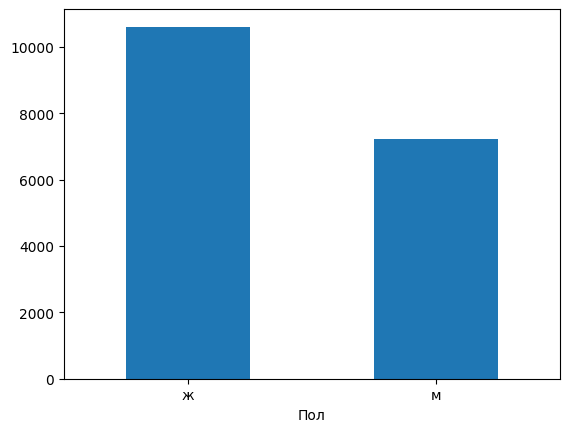

In [64]:
students_df['Пол'].value_counts().plot(kind='bar', rot=0)

In [81]:
students_df[students_df['Страна'] != "Российская Федерация"][['Специальность', 'Страна']].value_counts()

Специальность                                                 Страна                       
Педагогическое образование (с двумя профилями подготовки)     Туркменистан                     205
Подготовка к обучению по программе бакалавриата/специалитета  Иран                             173
Экономика                                                     Республика Узбекистан            123
Стоматология                                                  Иран                              84
Подготовка к обучению по программе бакалавриата/специалитета  Китайская Народная Республика     77
                                                                                              ... 
Педагогическое образование                                    Республика Турция                  1
Биология                                                      Китайская Народная Республика      1
Педагогическое образование (с двумя профилями подготовки)     Вьетнам                            1
                 

In [73]:
students_df.groupby("Страна")[['Квалификация', 'Специальность']].count()

,Квалификация,Специальность
Страна,,
Азербайджанская Республика,13,13
Алжирская Народная Демократическая Республика,1,1
Ангола,3,3
Афганистан,21,21
Бенин,4,4
Боливарианская Республика Венесуэла,1,1
Бурунди,1,1
ВЕНЕСУЭЛА,1,1
Венгрия,1,1


In [23]:
grade_df.groupby('Страна')[['Балл итоговый', 'Балл сдачи', 'Балл за семестр']].mean()

,Балл итоговый,Балл сдачи,Балл за семестр
Страна,,,
Российская Федерация,77.768608,46.699745,31.085159


### Про сотрудников


In [8]:
employee_df['Образование'].value_counts(), employee_df['Образование'].isna().sum()

(Образование
 Высшее                  9421
 Среднее (полное) общ     261
 Среднее Общее            125
 Среднее профессионал     124
 Среднее Спец.             92
 Среднее профес.           83
 не испол Среднее          57
 высшее (второе)           45
 Среднее специальное       36
 Среднее техническое       15
 Начальное профессион      12
 Магистратура              10
 Среднее Техн.              9
 не исп Ср Проф.            8
 Среднее неполное           6
 Высшее Н/З                 4
 НП                         4
 Основное общее             3
 Аспирантура                3
 Неоконченное высшее        3
 Проф.-техн.                2
 Повышение квалификац       1
 Name: count, dtype: int64,
 512)

In [9]:
employee_df['Страна'].value_counts()

Страна
Российская Федерация                         10405
РОССИЯ                                         199
УЗБЕКИСТАН                                      29
КАЗАХСТАН                                       26
КИТАЙ                                           22
СИРИЯ                                           19
ИРАН                                            12
РФ                                               9
Йемен                                            7
ТУРКМЕНИСТАН РЕСП                                6
ЕГИПЕТ                                           6
Мексика                                          5
КОРЕЯ, НАРОДНО-ДЕМОКРАТИЧЕСКАЯ РЕСПУБЛИКА        5
АЛЖИР                                            5
Вьетнам                                          4
ТАДЖИКИСТАН                                      4
Замбия                                           4
ИРАК                                             4
Республика Кот-д Ивуар                           3
ФРАНЦИЯ                 

In [11]:
employee_df['Звание'].value_counts(), employee_df['Звание'].isna().sum()
# подумать над этим
# какие преподаватели могут преподавать в университете
# есть ли тут пропущенные данные

(Звание
 Доцент                                            1856
 Профессор                                          468
 Старший научный сотрудник                           39
 Член-корреспондент Академии наук РТ                  6
 Профессор Российской академии наук                   5
 Академик  академии наук РТ                           4
 Член-корреспондент Российской академии наук          2
 Академик                                             2
 Академик Российской академии наук                    1
 Член-корреспондент международной академии наук       1
 Name: count, dtype: int64,
 8452)

In [16]:
dismissal = employee_df['Признак увольнения']
dismissal.value_counts()

Признак увольнения
0    10779
1       57
Name: count, dtype: int64

#### Сотрудники в признаком увольнения

In [21]:
employee_df[dismissal == 1]

,Вид исполнения кратко,Сотрудник,Дата приказа,Дата начала исполнения,Дата окончания исполнения,Категория сотрудника,Признак увольнения,Текущее состояние,Ставка,Отделение/кафедра,Звание,Степень,Структурное подразделение,Общий стаж,Пед. стаж,Образование,Дата рождения,Пол,Страна,Почетные звания
274,осн,Юлия Мансуровна,15.03.2024,19.03.2024,30.06.2024,УВП отраслслуж2-247н,1,NaN,"0,1",Кафедра иностранных языков в сфере международн...,NaN,NaN,Институт международных отношений,0 г 0 м 15 д,0 г 0 м 0 д,NaN,Ноябрь 2002,ж,Российская Федерация,0
586,вне,Лилия Аркадьевна,28.02.2024,01.03.2024,30.06.2024,ППС препод-217н,1,NaN,"0,2","Лаборатория ""Учебная газета""",NaN,NaN,Институт социально-философских наук и массовых...,25 г 5 м 2 д,0 г 1 м 2 д,Высшее,Июль 1979,ж,Российская Федерация,0
827,вну,Екатерина Салимовна,03.10.2023,04.10.2023,30.06.2024,ППС препод-217н,1,NaN,"0,25",кафедра русской литературы и методики ее препо...,NaN,NaN,Институт филологии и межкультурной коммуникации,0 г 6 м 25 д,0 г 6 м 25 д,Высшее,Сентябрь 1999,ж,Российская Федерация,0
829,осн,Татьяна Надировна,25.03.2024,25.03.2024,30.06.2025,УВП отраслслуж2-247н,1,NaN,"0,75",Научно-исследовательская лаборатория изучения ...,NaN,NaN,Институт геологии и нефтегазовых технологий,0 г 0 м 9 д,0 г 0 м 0 д,Среднее Общее,Январь 2001,ж,Российская Федерация,0
1053,осн,Элеонора Ринатовна,28.10.2022,01.11.2022,05.04.2024,Врачи провиз-526,1,NaN,"0,1",Отдел по научной деятельности,NaN,NaN,"Институт управления, экономики и финансов",1 г 7 м 6 д,0 г 0 м 0 д,Высшее,Май 1998,ж,Российская Федерация,0
1215,осн,Кира Викторовна,01.12.2023,01.12.2023,31.08.2026,ППС препод-217н,1,NaN,1,кафедра иностранных языков,NaN,кандидат филологических наук,Институт международных отношений,0 г 6 м 25 д,0 г 6 м 25 д,Высшее,Сентябрь 1999,ж,Российская Федерация,0
1482,вне,Дарья Павловна,29.09.2023,02.10.2023,12.04.2024,УВП ахо-217н,1,NaN,"0,5","научно-исследовательская лаборатория ""Лаборато...",NaN,NaN,НОЦ фармацевтики,10 г 1 м 14 д,0 г 0 м 0 д,Высшее,Октябрь 1993,ж,Российская Федерация,0
1483,осн,Татьяна Андреевна,27.03.2024,03.08.2023,05.04.2024,НВП научтех2-305н,1,Отпуск за свой счет,"0,5",Институт информационных технологий и интеллект...,NaN,NaN,Институт информационных технологий и интеллект...,0 г 9 м 18 д,0 г 0 м 0 д,Среднее (полное) общ,Июль 2002,ж,РОССИЯ,0
1546,осн,Элеонора Ринатовна,04.09.2023,04.09.2023,22.04.2024,ППС препод-217н,1,NaN,"0,5",Отдел обслуживания читателей на абонементах,NaN,NaN,Научная библиотека им. Н.И. Лобачевского,1 г 11 м 19 д,0 г 6 м 29 д,Высшее,Май 1998,ж,Российская Федерация,0
1617,вне,Земфира Алексеевна,06.03.2024,06.03.2024,30.06.2024,УВП отраслслуж2-247н,1,NaN,"0,5",кафедра романо-германской филологии,NaN,NaN,Институт филологии и межкультурной коммуникации,5 г 6 м 13 д,0 г 0 м 0 д,Среднее Общее,Апрель 1974,ж,Российская Федерация,0


In [25]:
employee_df[dismissal == 1].columns

Index(['Вид исполнения кратко', 'Сотрудник', 'Дата приказа',
       'Дата начала исполнения', 'Дата окончания исполнения',
       'Категория сотрудника', 'Признак увольнения', 'Текущее состояние',
       'Ставка', 'Отделение/кафедра', 'Звание', 'Степень',
       'Структурное подразделение', 'Общий стаж', 'Пед. стаж', 'Образование',
       'Дата рождения', 'Пол', 'Страна', 'Почетные звания'],
      dtype='object')

In [27]:
employee_df[dismissal == 1]['Образование'].value_counts(), employee_df[dismissal == 1]['Страна'].value_counts(), employee_df[dismissal == 1]['Структурное подразделение'].value_counts()

(Образование
 Высшее                  34
 Среднее (полное) общ     8
 Среднее профес.          4
 Среднее Общее            2
 Основное общее           1
 не испол Среднее         1
 Name: count, dtype: int64,
 Страна
 Российская Федерация    54
 РОССИЯ                   3
 Name: count, dtype: int64,
 Структурное подразделение
 Институт филологии и межкультурной коммуникации                                                                   6
 Институт фундаментальной медицины и биологии                                                                      6
 Институт международных отношений                                                                                  5
 Институт физики                                                                                                   5
 Институт геологии и нефтегазовых технологий                                                                       4
 Институт управления, экономики и финансов                                             

In [30]:
employee_df[dismissal == 1][['Общий стаж', 'Пед. стаж', 'Ставка', 'Текущее состояние']]

,Общий стаж,Пед. стаж,Ставка,Текущее состояние
274,0 г 0 м 15 д,0 г 0 м 0 д,"0,1",NaN
586,25 г 5 м 2 д,0 г 1 м 2 д,"0,2",NaN
827,0 г 6 м 25 д,0 г 6 м 25 д,"0,25",NaN
829,0 г 0 м 9 д,0 г 0 м 0 д,"0,75",NaN
1053,1 г 7 м 6 д,0 г 0 м 0 д,"0,1",NaN
1215,0 г 6 м 25 д,0 г 6 м 25 д,1,NaN
1482,10 г 1 м 14 д,0 г 0 м 0 д,"0,5",NaN
1483,0 г 9 м 18 д,0 г 0 м 0 д,"0,5",Отпуск за свой счет
1546,1 г 11 м 19 д,0 г 6 м 29 д,"0,5",NaN
1617,5 г 6 м 13 д,0 г 0 м 0 д,"0,5",NaN


In [31]:
employee_df['Текущее состояние'].isna().sum(), employee_df.shape[0]
# скорее всего, если значения прпоущены, то преподаватель работает

(9904, 10836)

### Про студентов